# 2018 BERT

[2018 BERT](https://arxiv.org/abs/1810.04805)
BERT, a bidirectional transformer, achieved impressive NLP results using global attention and combined training objectives.

### BERT (Bidirectional Encoder Representations from Transformers)
#### 1. Introduction to BERT
- **Description**: BERT is a transformer-based model pre-trained on a large corpus of text using two training objectives: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). Its bidirectional nature allows it to understand context from both left and right sides of a word.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/BERT_embeddings_01.png" alt="Transformer Architecture" width="800" height="600">

This image depicts the **BERT (Bidirectional Encoder Representations from Transformers)** model and how it processes tokens into contextual word embeddings. Let's break it down step by step:

### 1. **Input Tokens (Word Tokenization):**
   - At the bottom of the diagram, you see a sequence of tokens. These are the tokenized representations of a sentence. BERT uses **WordPiece tokenization** to split words into smaller subwords or individual characters.
   - Each token corresponds to a number. For example:
     - `101` is the `[CLS]` token, which is a special token added at the beginning of every sentence. This token is used by BERT to represent the entire sentence when generating a single output (e.g., for classification tasks).
     - Other tokens such as "and", "so", "far", etc., are tokenized into smaller units like `1998`, `1010`, `2061`, etc.
     - `102` is the `[SEP]` token, another special token used to separate different segments or indicate the end of a sequence.

   **Important Tokens:**
   - **`[CLS]` Token:** Added at the start of the sequence and used for tasks where a single output is needed for the entire sentence (e.g., classification tasks).
   - **`[SEP]` Token:** Added at the end (and potentially in the middle for multi-segment inputs) to signify the end of a sentence or to separate two sentences.

### 2. **Input IDs (Token IDs):**
   - The tokens are converted into **input IDs**. Each token is mapped to a unique identifier from the model’s vocabulary.
   - These numeric IDs are what the model processes instead of the raw text.
     - For example: `and` -> `1998`, `so` -> `2061`, etc.
   - These IDs represent subword units, and BERT can process partial words, which allows it to handle unknown words by breaking them down into smaller units.

### 3. **BERT as a Transformer Encoder:**
   - BERT consists of multiple layers of **Transformer encoders**. This part of the diagram highlights that the input tokens (now in the form of token IDs) are passed through the BERT model, which is made up of multiple Transformer encoder layers.
   - **What Happens Inside BERT:**
     - **Self-Attention Mechanism:** BERT uses self-attention to allow the model to consider the entire input sentence when processing each token. This mechanism enables BERT to understand the context of a word by looking at the words around it in both directions (bidirectionally).
     - **Multiple Encoder Layers:** BERT is made up of multiple Transformer layers (usually 12 or 24 layers). Each layer refines the contextual understanding of each token.

### 4. **Output Layer Hidden States:**
   - As the tokenized input passes through the Transformer encoder layers, it produces **hidden states** at each layer. Each hidden state is a vector representation of the corresponding input token that captures the contextual meaning based on the other tokens in the sentence.
   - The diagram shows that the hidden states from the **final layer** of BERT are used to generate the **contextual word embeddings**.

### 5. **Contextual Word Embeddings:**
   - Once the tokens have passed through the BERT layers, the final output is a set of **contextual embeddings** for each token.
   - These embeddings are different from traditional word embeddings (like Word2Vec) because:
     - They capture the **context** in which the word appears, meaning the same word can have different embeddings depending on its usage in the sentence.
     - For example, the word "right" could mean "correct" or "direction", and BERT will generate different embeddings for each meaning depending on the surrounding words.
   - The output embeddings for each token can be used for various tasks, such as:
     - **Token-level tasks:** Like Named Entity Recognition (NER), where each token’s embedding is classified individually.
     - **Sequence-level tasks:** Like sentiment analysis, where the `[CLS]` token's embedding is typically used to represent the whole sentence.

### Example Breakdown:
- **Input Sentence:** `"and , so far as they knew , they were quite right ."`
  - The sentence is tokenized, producing:
    - `101` (`[CLS]`), `1998` (`and`), `1010` (`,`), `2061` (`so`), ..., `102` (`[SEP]`).
- These token IDs are passed through BERT’s Transformer encoder layers, which apply self-attention to generate contextualized representations for each token.
- The output from BERT is a set of contextual word embeddings for each token in the sentence, capturing the meaning of each word based on its surrounding context.

---

### Key Points of the Diagram:
- **Tokenization and Input IDs**: Words are split into tokens and converted into numeric IDs that BERT can process.
- **Transformer Encoding**: The token IDs are passed through several layers of Transformer encoders, where BERT’s attention mechanism processes the tokens by looking at both the left and right contexts.
- **Contextual Embeddings**: The final output consists of contextual embeddings for each token, which are used in downstream NLP tasks. Each word’s embedding now captures its meaning relative to the words around it.

This diagram effectively demonstrates how BERT processes input sequences to create meaningful, contextualized word embeddings, which form the basis for its excellent performance in a wide range of NLP tasks.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/BERT_encoder-only_attention.svg/2880px-BERT_encoder-only_attention.svg.png" alt="Transformer Architecture" width="800" height="600">

This image provides a visual representation of how **self-attention** works within the BERT model's **Transformer encoder**. Let's break down the details of this diagram step by step.

### 1. **Input Sequence:**
   At the bottom of the image, we see an input sequence represented by tokens:
   ```
   <cls> I love <mask> this red car
   ```
   - **`<cls>` Token:** This special classification token is always added at the beginning of the sequence. It is used for tasks that require a single output for the whole sequence (e.g., sentence classification).
   - **`<mask>` Token:** In this example, one of the tokens ("love") is replaced with the `<mask>` token. This is done during BERT’s pre-training phase, where BERT tries to predict the masked word from the surrounding context. This is called **Masked Language Modeling (MLM)**.

### 2. **Transformer Encoder Block:**
   The middle section of the diagram represents a **Transformer encoder block**. This is the core architecture of BERT. The encoder processes the input sequence and applies **self-attention** to generate contextualized representations of each token.

   - **Self-Attention Mechanism:** In the encoder, self-attention allows each token to "attend" to every other token in the sequence. This is how BERT captures context for each word, both before and after a given token. The model determines how much attention each word should pay to other words in the sentence.
   
   - **Multiple Layers:** Though the diagram shows a single Transformer encoder block, BERT usually consists of multiple encoder layers (e.g., 12 layers for BERT-base and 24 for BERT-large). Each layer refines the token representations, producing more contextually aware embeddings as you go deeper into the model.

### 3. **Attention Input (Left Side):**
   On the left side of the diagram, we see the tokens fed into the self-attention mechanism of the Transformer encoder:
   ```
   <cls>, I, <mask>, this, red, car
   ```
   Each token in the input sequence interacts with every other token in the sequence through the attention mechanism. The self-attention mechanism computes attention scores for each token relative to every other token.

### 4. **Attention Output (Right Side):**
   The right side of the diagram shows the **output of the self-attention mechanism**. This section visually illustrates how each token interacts with every other token in the sequence.
   - The tokens are listed along the rows and columns, showing a grid-like structure:
     - On the **rows**: Each row corresponds to a token that is being processed and attended to.
     - On the **columns**: Each column shows the token that is influencing the row token’s representation.
   
   - For example, when processing the token `"car"`, the model will look at the other tokens in the sentence (`<cls>`, `I`, `<mask>`, `this`, `red`, etc.) and decide which tokens are most relevant for understanding the word "car."

   - The **blue squares** in the grid show how much attention each token gives to the others in the sequence. If the model assigns more weight to certain tokens, it pays more attention to them when calculating the new representation for the token.

   This **attention matrix** shows how the model attends to every token in the sequence, learning relationships between all the words.

### 5. **Output Contextualized Embeddings:**
   After the attention mechanism is applied, BERT outputs a new, **contextualized representation** for each token. These representations take into account the relationships between tokens, considering both the left and right contexts.

   - **Contextualized Representations:** The tokens are now represented as embeddings that contain information about their surrounding tokens. For example:
     - The embedding for `"car"` will take into account that it's described by the word `"red"`.
     - The embedding for the `<mask>` token will contain information from its context, allowing BERT to predict that `"love"` is likely the missing word.

### Key Aspects of the Diagram:

1. **Self-Attention Across the Entire Sequence:**
   - Each token in the sequence is connected to every other token through self-attention.
   - BERT uses **bidirectional self-attention**, meaning it considers the context from both directions (left and right), which is why it can understand relationships between tokens in a very comprehensive way.
   
2. **Masked Language Model (MLM):**
   - The `<mask>` token is an example of BERT’s pre-training task, where it tries to predict the masked token based on the other tokens. This task helps the model learn better representations of words by forcing it to consider the surrounding context.

3. **Final Contextual Embeddings:**
   - After passing through the Transformer encoder, each token in the sequence (including `<cls>`, `<mask>`, and `"car"`) is assigned a **contextual embedding**. These embeddings are used for downstream tasks, such as classification, question answering, or next-word prediction.

---

### Example:
Let’s walk through the input sentence:
```
<cls> I love <mask> this red car
```

- **Self-Attention Example for "car":**
  - The word "car" attends to other tokens in the sentence, including `<cls>`, `<mask>`, "red", "this", and "I". The word "red" likely gets more attention because "red" is an important modifier for "car."
  
- **Masked Token Prediction for `<mask>`:**
  - The word "love" is masked, and BERT uses the context from the other tokens (e.g., "I", "this", "car") to predict that the missing word should be "love".

- **Final Contextual Representation:** 
  - After the attention mechanism has been applied to every token, the model generates contextual embeddings for each token, which can then be used for various NLP tasks (e.g., filling in the missing word or classifying the sentence).

---

This diagram helps visualize how the **Transformer encoder** processes an input sequence through self-attention, showing how each token’s output is influenced by every other token in the sequence. It illustrates the **core architecture of BERT** and how it generates rich, context-aware embeddings for NLP tasks.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/65/BERT_input_embeddings.png" alt="Transformer Architecture" width="800" height="600">

This image represents the **embedding process** in the BERT model, detailing how the input sequence is prepared before it enters the Transformer layers. Let's break down each part of the image step by step:

### 1. **Input Sequence:**
At the top of the image, you see the input sequence:
```
[CLS] alice follows the white rabbit [SEP] follow the white rabbit neo [SEP]
```
- **`[CLS]` Token**: A special classification token added to the beginning of the sequence. In BERT, it is used to generate a representation of the entire input sequence. This representation is useful for classification tasks (e.g., sentiment analysis, sentence classification).
- **`[SEP]` Tokens**: Special separator tokens used to distinguish between two sentences or segments. In this example, there are two sentences: "alice follows the white rabbit" and "follow the white rabbit neo." The `[SEP]` token is used to mark the end of each segment.
- The rest of the tokens are words in the input sentences: `"alice"`, `"follows"`, `"the"`, `"white"`, `"rabbit"`, `"follow"`, etc.

### 2. **Token Embeddings:**
The first row in the embedding section represents the **token embeddings**. BERT uses **WordPiece tokenization**, where each word or subword is mapped to a unique token embedding. Each token in the input sequence is converted into a corresponding dense vector (embedding):
- **`E[CLS]`**: The embedding for the `[CLS]` token.
- **`E_alice`, `E_follows`, `E_the`**, etc.: The embeddings for the words "alice", "follows", "the", etc.
- **`E[SEP]`**: The embedding for the `[SEP]` token.

These embeddings are learned during BERT's training and capture semantic meaning for each word/subword. Words with similar meanings will have similar embeddings.

### 3. **Position Embeddings:**
The second row in the embedding section represents the **position embeddings**. BERT is not inherently aware of the order of the tokens in a sequence (unlike RNNs), so it uses position embeddings to introduce this information:
- **`E_0`, `E_1`, `E_2`**, etc.: These embeddings represent the **position** of each token in the sequence. For example, `E_0` represents the position of the `[CLS]` token, `E_1` represents the position of the word "alice", and so on.
- Position embeddings help BERT understand the order of words in the sequence. Without these, BERT would treat the input as a bag of words, ignoring their sequential nature.

### 4. **Segment Embeddings:**
The third row represents **segment embeddings**. Since BERT is often used for tasks that involve comparing two sentences (like question answering or natural language inference), it needs a way to distinguish between different segments or sentences in the input:
- **`E_A` and `E_B`**: These are segment embeddings. In this case:
  - The first segment (or sentence) is "alice follows the white rabbit," and it is marked with `E_A` for each token in that segment.
  - The second segment (or sentence) is "follow the white rabbit neo," and it is marked with `E_B` for each token in that segment.
- Segment embeddings allow BERT to know which tokens belong to which sentence or segment in tasks that involve multiple sentences.

### 5. **Final Input Embedding:**
For each token in the input sequence, the final embedding is computed by **adding** the following components:
   - **Token Embedding**: The learned representation of the token itself.
   - **Position Embedding**: The learned representation of the token’s position in the sequence.
   - **Segment Embedding**: The learned representation of the segment to which the token belongs.

This addition results in a single **contextualized embedding** for each token that BERT will then process using its Transformer layers.

### Example of Final Embedding:
Let's consider the token `"alice"`:
- **Token Embedding**: `E_alice` (embedding for the token "alice").
- **Position Embedding**: `E_1` (since "alice" is the second token in the sequence).
- **Segment Embedding**: `E_A` (since "alice" belongs to the first segment, or sentence).

The final embedding for `"alice"` is calculated as:
```
E_alice_final = E_alice + E_1 + E_A
```

This same process is applied to every other token in the input sequence.

---

### Key Takeaways:
- **Token Embeddings**: Capture the meaning of each word or subword in the sequence.
- **Position Embeddings**: Provide information about the position of each token in the sequence.
- **Segment Embeddings**: Distinguish between different segments or sentences in the input.
- These three types of embeddings are **added together** for each token to form the final input embeddings that BERT uses.

These embeddings are then passed through BERT’s Transformer layers, which apply self-attention and other mechanisms to generate contextualized word representations for use in downstream tasks like classification, question answering, or named entity recognition.

Would you like to explore more details on how these embeddings are processed in the Transformer, or how BERT uses them in specific tasks?

/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Input: I love this red car!
Logits: tensor([[-0.1510,  0.0270]])
Probabilities: tensor([[0.4556, 0.5444]])


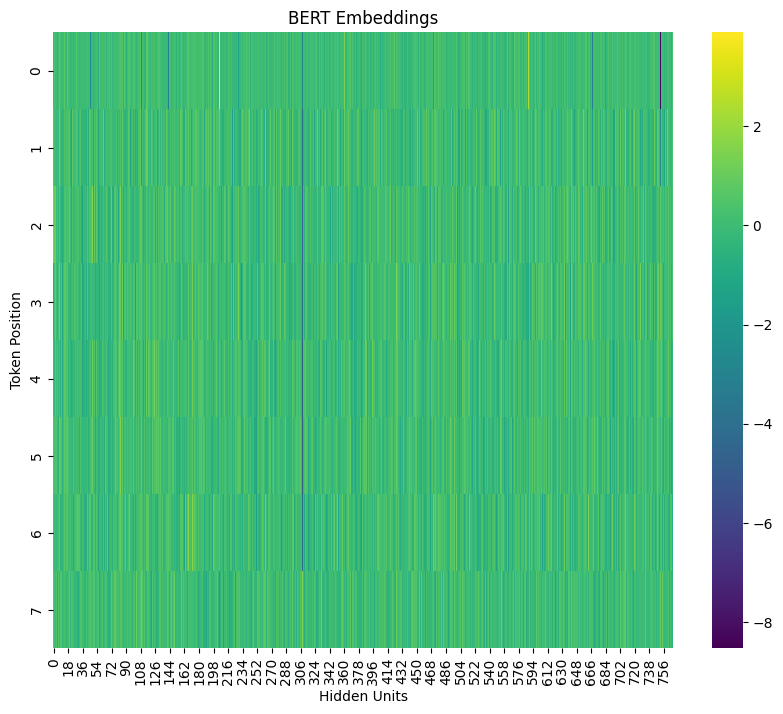

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


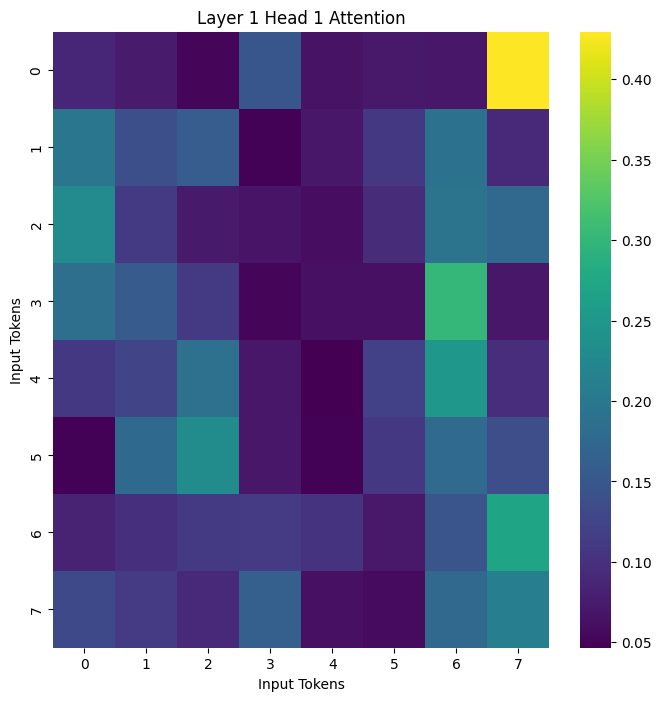

In [66]:
### Step-by-Step Code Example for BERT

#### Import Libraries
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load Pre-trained BERT

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

#### Text Classification Example

# Define input text for classification
input_text = "I love this red car!"

# Tokenize input text and get token IDs
inputs = tokenizer(input_text, return_tensors='pt')

# Pass the token IDs through the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract the classification logits
logits = outputs.logits

# Apply softmax to get probabilities
probs = torch.nn.functional.softmax(logits, dim=-1)

# Print the results
print(f"Input: {input_text}")
print(f"Logits: {logits}")
print(f"Probabilities: {probs}")

#### Visualizing BERT's Embeddings

# Load pre-trained BERT model for embeddings
model = BertModel.from_pretrained('bert-base-uncased')

# Get the last hidden state from the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract embeddings from the last hidden state
embeddings = outputs.last_hidden_state.squeeze().numpy()

# Visualize the embeddings using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(embeddings, cmap='viridis')
plt.title('BERT Embeddings')
plt.xlabel('Hidden Units')
plt.ylabel('Token Position')
plt.show()

#### Visualizing BERT's Attention Mechanism

# Load BERT model with output_attentions=True
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Get attentions from the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract attention weights
attentions = outputs.attentions  # List of tensors for each layer

# Visualize attention for a specific layer and head
def plot_attention_weights(attn_weights, layer=0, head=0):
    attn_for_head = attn_weights[layer][0][head].detach().numpy()
    plt.figure(figsize=(8, 8))
    sns.heatmap(attn_for_head, cmap='viridis')
    plt.title(f'Layer {layer+1} Head {head+1} Attention')
    plt.xlabel('Input Tokens')
    plt.ylabel('Input Tokens')
    plt.show()

# Visualize the attention from the first layer and the first head
plot_attention_weights(attentions, layer=0, head=0)


### Summary and Next Steps

- **Summary**: This notebook demonstrates how to use BERT for text classification, visualize token embeddings, and interpret the attention mechanism.
- **Next Steps**: Expand the notebook to include other NLP tasks like NER or Question Answering using BERT. Explore using different BERT variants like `bert-large` or fine-tuning BERT on a specific dataset.

This notebook covers a broad overview of how to use and visualize BERT, leveraging the pre-trained models and tokenizers provided by the Hugging Face `transformers` library.

### Explanation
- Loading the Tokenizer and Model: We use a pre-trained BERT model fine-tuned on the CoNLL-2003 NER dataset. This model (dbmdz/bert-large-cased-finetuned-conll03-english) is designed for recognizing entities like locations, organizations, and personal names.
- Tokenizing the Input: The input text is tokenized into word pieces using the tokenizer, converting the text into a sequence of token IDs.
- Making Predictions: The token IDs are passed through the model, which outputs logits for each token, indicating the likelihood of each token belonging to one of the NER classes.
- Extracting Predicted Labels: The logits are converted into predicted indices, and these indices are mapped to their corresponding NER labels using the model’s configuration.
- Output: The tokens and their predicted labels are printed, showing the NER results.

## NER

To identify entities and relationships from a larger body of text, you can use BERT for Named Entity Recognition (NER) and then extract potential relationships between the identified entities. Here's a step-by-step guide to accomplish this:

#### 1. **NER with BERT**: 

First, use BERT to identify entities within the text. We'll categorize these entities (e.g., persons, organizations, locations).

#### 2. **Extracting Relationships**: 

Once entities are identified, we can use simple rules or a dependency parser to identify relationships between entities based on their context in the sentence.

#### 3. **Visualization**: Optionally, you can visualize these entities and relationships using a library like `networkx` for graph representations or `spacy` for dependency parsing.

#### Step 1: Load BERT for NER and Tokenize Larger Text



In [35]:
from transformers import BertTokenizer, BertForTokenClassification
import torch

# Load pre-trained BERT tokenizer and model for NER
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')
model = BertForTokenClassification.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')

# Define a larger input text for NER
input_text = """
Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge.
Google LLC, located in Mountain View, California, is known for its search engine and numerous other tech products.
Elon Musk, the CEO of SpaceX and Tesla, has announced a new project in collaboration with NASA.
"""

# Tokenize the input text and get token IDs
inputs = tokenizer(input_text, return_tensors='pt', truncation=True, padding=True)

# Pass the token IDs through the model
outputs = model(**inputs)

# Get the predicted token classes (logits) and convert them to predicted indices
predictions = torch.argmax(outputs.logits, dim=2)

# Map predicted indices to NER labels
ner_tags = model.config.id2label

# Decode tokens and extract labels
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
predicted_labels = [ner_tags[pred] for pred in predictions.squeeze().tolist()]

# Extract and print entities with improved handling for sub-tokens and multi-word entities
entities = []
current_entity = ""
current_label = ""
for token, label in zip(tokens, predicted_labels):
    if label != 'O':
        # Handle sub-tokens by concatenating them
        if token.startswith('##'):
            current_entity += token[2:]  # Append sub-token to the current entity
        else:
            if current_entity and current_label == label:  # Continue the current entity
                current_entity += " " + token
            else:  # Start a new entity
                if current_entity:  # If there's an ongoing entity, add it to the entities list
                    entities.append((current_entity, current_label))
                current_entity = token
                current_label = label
    else:
        if current_entity:  # If not an entity and there's an ongoing entity, store it
            entities.append((current_entity, current_label))
            current_entity = ""
            current_label = ""

# Add the last entity if any
if current_entity:
    entities.append((current_entity, current_label))

# Print the entities
for entity, label in entities:
    print(f"{entity}: {label}")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Hugging Face Inc: I-ORG
New York City: I-LOC
DUMBO: I-LOC
Manhattan Bridge: I-LOC
Google LLC: I-ORG
Mountain View: I-LOC
California: I-LOC
Elon Musk: I-PER
SpaceX: I-ORG
Tesla: I-ORG
NASA: I-ORG


### Step 2: Extracting Relationships
You can extract relationships between entities based on their sentence context. For this, you can use simple rules or advanced methods like dependency parsing. Here, we'll use a basic approach to group entities within the same sentence.



In [61]:
import spacy

# Load SpaCy model for dependency parsing
nlp = spacy.load("en_core_web_sm")

# Parse the text into sentences using SpaCy
doc = nlp(input_text)

# Extract entities and map them to their sentence
entity_dict = {entity.text: entity.label_ for entity in doc.ents}

# Extract relationships using dependency parsing
relationships = []
for sent in doc.sents:
    entities_in_sentence = [ent for ent in doc.ents if ent.sent == sent]
    for token in sent:
        if token.pos_ == 'VERB':
            # Identify subjects and objects of the verb within the same sentence
            subject = [w for w in token.lefts if w.dep_ in ('nsubj', 'nsubjpass', 'attr', 'poss')]
            objects = [w for w in token.rights if w.dep_ in ('dobj', 'attr', 'prep', 'pobj', 'advmod')]

            # Expand the object to include prepositional phrases
            more_info = []
            for obj in objects:
                more_info.extend([child for child in obj.subtree if child.dep_ in ('pobj', 'compound', 'nmod')])

            # Construct subject and object entities
            subj_entity = ' '.join([w.text for w in subject])
            obj_entity = ' '.join([w.text for w in objects + more_info])

            # Try to match entities within the same sentence
            subj_full_entity = next((ent.text for ent in entities_in_sentence if subj_entity in ent.text), subj_entity)
            obj_full_entity = next((ent.text for ent in entities_in_sentence if obj_entity in ent.text), obj_entity)

            # Use the original verb form from the text instead of the lemma
            verb_text = token.text

            # Add relationships if both subject and object are found and are not redundant
            if subj_full_entity and obj_full_entity and subj_full_entity != obj_full_entity:
                relationships.append((subj_full_entity, verb_text, obj_full_entity))

# Print the extracted entities
print("Entities:")
for entity, label in entity_dict.items():
    print(f"{entity}: {label}")

# Print the enhanced relationships
print("\nEnhanced Extracted Relationships:")
for subj, rel, obj in relationships:
    print(f"{subj} -> {rel} -> {obj}")


Entities:
Hugging Face Inc.: ORG
New York City: GPE
DUMBO: ORG
the Manhattan Bridge: FAC
Google LLC: ORG
Mountain View: GPE
California: GPE
Elon Musk: PERSON
SpaceX: NORP
Tesla: ORG
NASA: ORG

Enhanced Extracted Relationships:
Hugging Face Inc. -> based -> in New York City
Google LLC -> located -> in Mountain View
Google LLC -> known -> for search engine tech
Elon Musk -> announced -> project collaboration NASA


### Step 3: Visualizing Entities and Relationships
You can use libraries like `networkx` to create a graph representation of entities and their relationships.

Entities:
Hugging Face Inc.: ORG
New York City: GPE
DUMBO: ORG
the Manhattan Bridge: FAC
Google LLC: ORG
Mountain View: GPE
California: GPE
Elon Musk: PERSON
SpaceX: NORP
Tesla: ORG
NASA: ORG

Enhanced Extracted Relationships:
Google LLC -> known -> for search engine tech
Hugging Face Inc. -> based -> in New York City
Google LLC -> located -> in Mountain View
Elon Musk -> announced -> project collaboration NASA


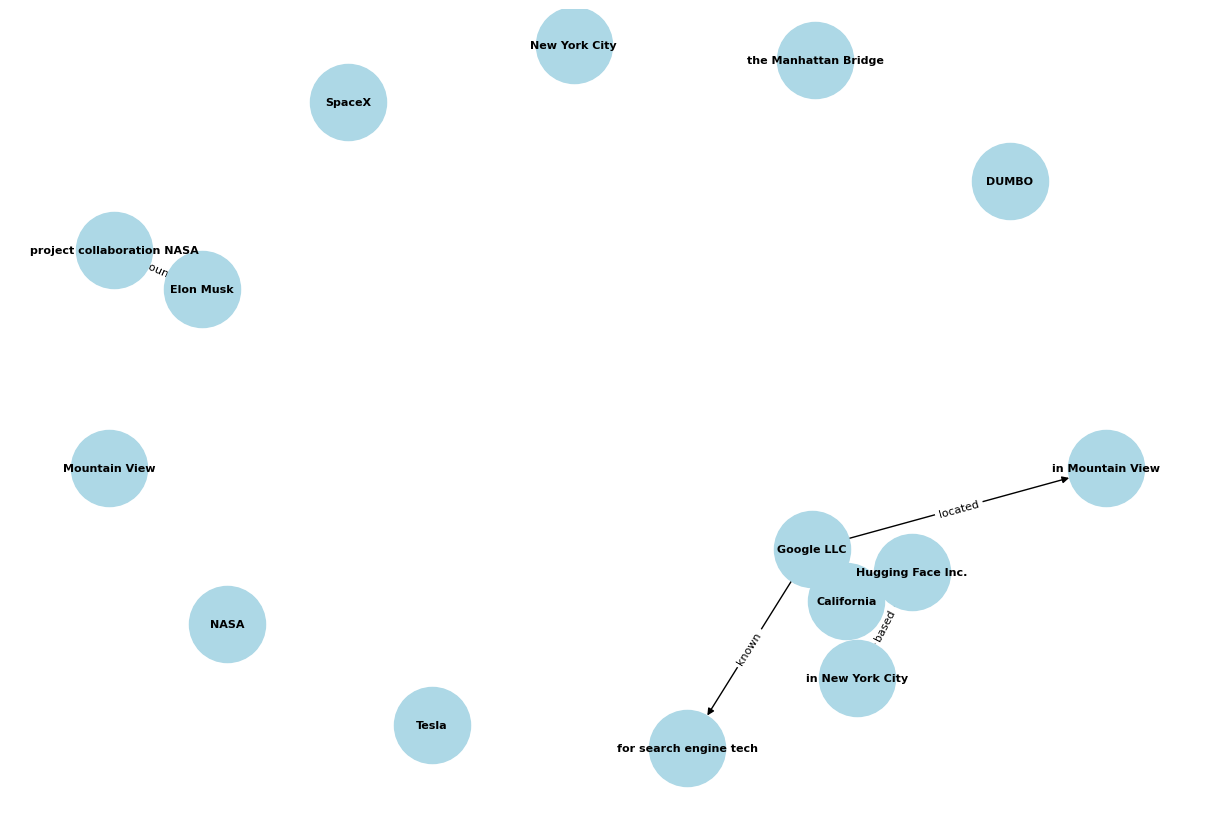

In [64]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load SpaCy model for dependency parsing
nlp = spacy.load("en_core_web_sm")

# Define input text
input_text = """
Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge.
Google LLC, located in Mountain View, California, is known for its search engine and numerous other tech products.
Elon Musk, the CEO of SpaceX and Tesla, has announced a new project in collaboration with NASA.
"""

# Parse the text into sentences using SpaCy
doc = nlp(input_text)

# Extract entities and map them to their sentence
entity_dict = {entity.text: entity.label_ for entity in doc.ents}

# Extract relationships using dependency parsing
relationships = set()
for sent in doc.sents:
    entities_in_sentence = [ent for ent in doc.ents if ent.sent == sent]
    for token in sent:
        if token.pos_ == 'VERB':
            # Identify subjects and objects of the verb within the same sentence
            subject = [w for w in token.lefts if w.dep_ in ('nsubj', 'nsubjpass', 'attr', 'poss')]
            objects = [w for w in token.rights if w.dep_ in ('dobj', 'attr', 'prep', 'pobj', 'advmod')]

            # Expand the object to include prepositional phrases
            more_info = []
            for obj in objects:
                more_info.extend([child for child in obj.subtree if child.dep_ in ('pobj', 'compound', 'nmod')])

            # Construct subject and object entities
            subj_entity = ' '.join([w.text for w in subject])
            obj_entity = ' '.join([w.text for w in objects + more_info])

            # Try to match entities within the same sentence
            subj_full_entity = next((ent.text for ent in entities_in_sentence if subj_entity in ent.text), subj_entity)
            obj_full_entity = next((ent.text for ent in entities_in_sentence if obj_entity in ent.text), obj_entity)

            # Use the original verb form from the text instead of the lemma
            verb_text = token.text

            # Add relationships if both subject and object are found and are not redundant
            if subj_full_entity and obj_full_entity and subj_full_entity != obj_full_entity:
                relationships.add((subj_full_entity, verb_text, obj_full_entity))

# Print the extracted entities
print("Entities:")
for entity, label in entity_dict.items():
    print(f"{entity}: {label}")

# Print the enhanced relationships
print("\nEnhanced Extracted Relationships:")
for subj, rel, obj in relationships:
    print(f"{subj} -> {rel} -> {obj}")

# Create a graph
G = nx.DiGraph()

# Add nodes and edges while ensuring uniqueness
for entity, label in entity_dict.items():
    G.add_node(entity, label=label)

for subj, rel, obj in relationships:
    G.add_edge(subj, obj, label=rel)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=8, font_weight='bold', node_size=3000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()


### Explanation

- **NER with BERT**: The code identifies entities in the larger text using the fine-tuned BERT model. It prints out tokens and their corresponding labels.
- **Extracting Relationships**: Using SpaCy for sentence segmentation, the code groups entities within the same sentence, which could indicate a relationship.
- **Visualization**: `networkx` is used to visualize entities and relationships, where each node represents an entity, and edges represent potential relationships.

### Enhancing Relationship Extraction

To improve the relationship extraction:
- Use dependency parsing to identify more complex relationships between entities.
- Implement custom rules or use pre-trained relationship extraction models to understand the nature of relationships (e.g., "works for," "located in").

This approach provides a simple way to identify entities and visualize potential relationships within a larger body of text using BERT.

In [26]:
from transformers import BertTokenizer, BertForTokenClassification
import torch

# Load pre-trained BERT tokenizer and model for NER
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')
model = BertForTokenClassification.from_pretrained('dbmdz/bert-large-cased-finetuned-conll03-english')

# Define the input text for NER
input_text = """
Hugging Face Inc. is a company based in New York City. 
Elon Musk, the CEO of SpaceX and Tesla, has announced a new project in collaboration with NASA.
Jeff Bezos, the founder of Amazon, also visited New York last week.
"""

# Tokenize the input text and get token IDs
inputs = tokenizer(input_text, return_tensors='pt', truncation=True, padding=True)

# Pass the token IDs through the model
outputs = model(**inputs)

# Get the predicted token classes (logits) and convert them to predicted indices
predictions = torch.argmax(outputs.logits, dim=2)

# Map predicted indices to NER labels
ner_tags = model.config.id2label

# Decode tokens and extract labels
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
predicted_labels = [ner_tags[pred] for pred in predictions.squeeze().tolist()]

# Extract and print persons with improved handling for sub-tokens
persons = []
current_person = ""
for token, label in zip(tokens, predicted_labels):
    if label == 'B-PER' or (label == 'I-PER' and not current_person):
        # Start of a new person entity
        if current_person:  # If there was an ongoing person, add it to persons
            persons.append(current_person)
        current_person = token if not token.startswith('##') else token[2:]  # Handle sub-tokens starting with '##'
    elif label == 'I-PER' and current_person:
        # Continuation of the current person entity
        if token.startswith('##'):
            current_person += token[2:]  # Append without space if sub-token
        else:
            current_person += ' ' + token
    else:
        if current_person:  # If no longer in a person entity, store the current one
            persons.append(current_person)
            current_person = ""

# Handle the last person if any
if current_person:
    persons.append(current_person)

print("\nIdentified Persons:")
for person in persons:
    print(person)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



Identified Persons:
Elon Musk
Jeff Bezos


### BERT Architecture
BERT is built on the Transformer architecture, which is based on self-attention mechanisms. The architecture consists of an encoder stack that processes the input text in a bidirectional manner. The key components include:

#### 1. **Input Representation:**
Each input token is converted into a vector representation that combines three embeddings:
- **Token Embedding:** Represents the word tokens in the vocabulary.
- **Segment Embedding:** Differentiates between different sentences in tasks like Question Answering (QA).
- **Position Embedding:** Adds information about the position of each token in the sequence.

Mathematically, the input representation for a token \( t_i \) can be expressed as:
$$
\text{Input}_{i} = \text{TokenEmb}_{i} + \text{SegmentEmb}_{i} + \text{PositionEmb}_{i}
$$

#### 2. **Self-Attention Mechanism:**
BERT uses a multi-head self-attention mechanism to allow each token to attend to every other token in the input sequence. This is represented by:
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$
Where:
- \( Q \) (Query), \( K \) (Key), and \( V \) (Value) are projections of the input embeddings.
- \( d_k \) is the dimension of the keys.

#### 3. **Encoder Layers:**
BERT consists of \( N \) identical layers, each containing:
- **Multi-head Self-Attention:** Multiple self-attention mechanisms running in parallel.
- **Feed-Forward Neural Network (FFNN):** Applies a two-layer fully connected network to each token independently.

Each encoder layer can be expressed as:
$$
\text{LayerNorm}(X + \text{FFN}(\text{LayerNorm}(X + \text{MultiHeadAttention}(X))))
$$

#### 4. **Output Representation:**
The output of BERT is a contextualized embedding for each token. For tasks like sequence classification, the special token [CLS] is used as an aggregate representation of the entire sequence:
$$
\text{Output}_{\text{CLS}} = f_{\theta}([\text{CLS}])
$$

Where $f_{\theta}$ is the model function parameterized by $\theta$.

### Pre-training Objectives
BERT is pre-trained using two main objectives:
1. **Masked Language Model (MLM):** Randomly masks some of the tokens in the input, and the model is trained to predict these masked tokens:
$$
\text{Loss}_{\text{MLM}} = -\sum_{i=1}^{N} \log P(x_i | X_{\backslash i})
$$
2. **Next Sentence Prediction (NSP):** Trains the model to predict whether two given sentences are contiguous in the original text:
$$
\text{Loss}_{\text{NSP}} = -\log P(\text{IsNext} | S_1, S_2)
$$

### Fine-Tuning
After pre-training, BERT can be fine-tuned on specific tasks by adding a task-specific layer on top of the [CLS] token or individual token embeddings, depending on the task.

### BertViz
To finish lets visualize attention

In summary, BERT leverages the transformer architecture's bidirectional nature and self-attention mechanisms to create deep contextualized embeddings for natural language understanding tasks.



In [67]:
# Step 1: Import necessary modules
from transformers import BertTokenizer, BertModel
from bertviz import head_view
import torch

# Step 2: Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Step 3: Define the input text
input_text = "The quick brown fox jumps over the lazy dog."

# Step 4: Tokenize the input text and convert to tensor
inputs = tokenizer.encode(input_text, return_tensors='pt')

# Step 5: Pass the input through the model to get the outputs (including attention)
outputs = model(inputs)

# Extract hidden states and attention scores from model outputs
hidden_states = outputs.last_hidden_state
attentions = outputs.attentions  # Attention scores from each layer

# Step 6: Visualize attention using BertViz's head_view
tokens = tokenizer.convert_ids_to_tokens(inputs[0])
head_view(attentions, tokens)


/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<IPython.core.display.Javascript object>

In [ ]:
#jupyter labextension install @jupyter-widgets/jupyterlab-manager

This **BertViz** visualization of attention heads within the **BERT** (Bidirectional Encoder Representations from Transformers) model. Here's an explanation of what we're seeing:

### **Explanation of the Visualization:**
1. **Two Columns of Tokens:**
   - On the left and right, you see the input tokens for the sentence: `"[CLS] the quick brown fox jumps over the lazy dog . [SEP]"`.
   - The input sentence has been tokenized into words and special tokens (`[CLS]`, `[SEP]`).
   
2. **Layer Selector:**
   - At the top of the image, there's a dropdown labeled "Layer" that allows you to choose which **layer** of the BERT model's attention heads to visualize.
   - BERT has multiple layers (for example, BERT-base has 12 layers), and each layer can have multiple attention heads. This visualization shows attention patterns from a specific layer.

3. **Colored Attention Heads:**
   - Each colored line represents a different **attention head** in the selected layer. 
   - Attention heads indicate which tokens the model is attending to, meaning where each token is focusing its attention in relation to other tokens in the sentence.
   - The thickness or intensity of the lines corresponds to how much attention is being given between the tokens.

4. **[CLS] Token:**
   - **[CLS]** is a special token added to the beginning of every input sentence in BERT.
   - This token is used to represent the entire sentence or sequence. In classification tasks, the output embedding corresponding to the **[CLS]** token is often used as the aggregate sentence representation.
   
5. **[SEP] Token:**
   - **[SEP]** is a separator token. It is used to separate two sentences in sentence-pair tasks (e.g., question answering, next sentence prediction).
   - Even when there's only one sentence, **[SEP]** is still added at the end to mark the end of the sequence.

6. **Attention Patterns:**
   - In our visualization, you can see attention patterns across different words. Each line represents how much one word is attending to another.
   - For example, **[CLS]** might be attending to several tokens, as it tries to aggregate information about the entire sentence.
   - The same token on both the left and right sides (e.g., "the" on the left is attending to "the" on the right) indicates how self-attention is happening within the model. The model is deciding which parts of the sentence each token should focus on.

### How to interpret this visualization:
- **Self-attention**: Each word in the sentence can attend to other words, including itself. In the self-attention mechanism of BERT, each token in a sequence can focus on different parts of the input.
- **Attention distribution**: The lines show how much attention (focus) each token is placing on other tokens in the sequence. For example, in this visualization, you may notice how the **[CLS]** token attends to all other tokens since it's intended to represent the entire sequence.
- **Layer and head-specific attention**: Since this is showing a single attention head from a specific layer, different attention heads and layers would show different attention patterns. You can explore by switching layers and heads.

This tool is helpful in understanding how BERT’s multi-head attention works under the hood, by providing a visual map of how attention is distributed across tokens in a sentence.

Lets analyze the attention patterns for the `[CLS]` token across different layers in a transformer model for BERT. Analyzing the role of `[CLS]` across all 12 layers helps us understand how the model is attending to various aspects of the input sequence at different depths.

### High-Level Understanding of `[CLS]` in BERT:

The `[CLS]` token plays a crucial role in BERT, especially for classification tasks. It represents a global understanding of the entire input sentence, and its final hidden state often acts as the aggregated representation of the input sequence for downstream tasks (e.g., sentence classification, sentence pair classification).

In BERT’s self-attention mechanism, each layer comprises multiple heads, and these heads learn different types of dependencies between tokens in the input sequence. By examining the attention patterns, we can understand how the model shifts its focus as it processes the input through successive layers.

### Layer-by-Layer Analysis of `[CLS]`:

#### **Layer 1:**
- `[CLS]` in this early layer seems to distribute its attention across most tokens fairly evenly.
- This is typical of initial layers, where the model doesn't yet understand specific relationships but is focusing on gathering basic information from the input tokens.
- The attention pattern is diffuse, meaning no single token is heavily attended to, as the model is still building an understanding.

#### **Layer 2:**
- As we move deeper, the `[CLS]` token starts narrowing its attention slightly, possibly focusing more on nearby tokens such as "the" and "quick."
- This signifies that the model begins to prioritize local context while still maintaining a broad focus.

#### **Layer 3:**
- The attention becomes slightly more concentrated towards the end of the sentence.
- We start seeing more structured attention patterns as the model tries to aggregate information related to the full sentence. `[CLS]` now focuses on understanding more complex relationships.

#### **Layer 4:**
- Attention becomes sharper, likely focusing on tokens that contribute more to the overall meaning of the sentence.
- For example, it might focus on significant words such as "fox" and "dog," which are key content words in the sentence. `[CLS]` is now gathering meaningful information for higher-level representation.

#### **Layer 5:**
- The attention pattern continues to consolidate around important tokens, but it's possible that some attention is also spent on separator tokens (such as `[SEP]`).
- At this layer, we expect the model to start refining its understanding of sentence-level semantics.

#### **Layer 9:**
- By Layer 9, attention from `[CLS]` is highly concentrated. The model is now using the `[CLS]` token as a summary of the entire input.
- The attention may be focused heavily on specific tokens that encapsulate the sentence's meaning, such as "fox," "jumps," and "lazy."

#### **Layer 10:**
- Similar to Layer 9, attention remains highly concentrated.
- The model's focus might shift to content-rich tokens that are essential for capturing the overall meaning or specific details relevant for tasks like classification.

#### **Layer 11:**
- At this point, `[CLS]` may focus almost exclusively on key content words or summary tokens.
- The attention map becomes sparse, as the model has already built a detailed representation and is now filtering the most crucial aspects of the sentence.
  
#### **General Pattern:**
Across all layers, the `[CLS]` token starts with distributed attention, gathering information from all parts of the sentence. As the layers progress, the model begins to hone in on specific parts of the sentence, typically focusing on important nouns, verbs, or key tokens, and by the final layers, `[CLS]` is used to encode a global understanding of the sentence.

### Conclusion:
- Early layers distribute attention broadly, building up initial context.
- Middle layers begin to focus on more relevant parts of the input sequence, especially content words.
- In the final layers, attention becomes highly concentrated, with the `[CLS]` token collecting information critical for downstream tasks like sentence classification or sentiment analysis.



Let's dive deeper into how attention evolves across different layers for tokens other than `[CLS]`. In BERT, each token has its own self-attention mechanism, meaning it pays attention to other tokens in the sequence based on the learned weights in each layer. By looking at how different tokens (like `"the"`, `"quick"`, `"fox"`, etc.) behave across layers, we can better understand how BERT captures local and global dependencies.

### Layer-by-Layer Analysis for Specific Tokens:

For the sake of simplicity, let's focus on some key tokens like `"fox"`, `"lazy"`, and `"dog"` and observe how their attention evolves:

#### **Token: "fox"**
- **Layer 1:**
  - In early layers, "fox" likely attends to its immediate neighbors such as `"quick"` and `"brown"`.
  - The attention at this stage is distributed locally, focusing on building a sense of the immediate context around the token.

- **Layer 3:**
  - By the third layer, the attention of "fox" may expand to include more distant tokens like `"jumps"` and `"dog"`, which are essential to its role in the sentence.
  - This shows how the model starts incorporating broader context while still retaining local dependency.

- **Layer 5:**
  - At this stage, "fox" may attend more strongly to action verbs like `"jumps"`, indicating that the model is capturing relationships between the subject (fox) and the verb.
  - We might also see the model attending to tokens like `[SEP]` as it processes sentence boundaries.

- **Layer 9:**
  - Here, "fox" could attend to global context, including the final token `"dog"`, as the model refines its understanding of the sentence's structure.
  - Attention on `"jumps"` and `"lazy"` might intensify as the model captures long-range dependencies.

- **Layer 12:**
  - In the final layers, "fox" will likely distribute its attention towards tokens that contribute to its semantic role in the sentence (e.g., `"jumps"` and `"dog"`), reflecting the model's complete understanding of subject-action-object relationships.

#### **Token: "lazy"**
- **Layer 1:**
  - In early layers, "lazy" will likely attend to its immediate neighbors, particularly `"the"` and `"dog"`.
  - This helps build local syntactic information, such as adjective-noun relationships.

- **Layer 3:**
  - By Layer 3, "lazy" might start attending to more distant words such as `"jumps"` or `"over"`, showing that the model is capturing the entire action related to `"dog"`.

- **Layer 5:**
  - The attention shifts towards the semantic relationship between "lazy" and its modifying noun `"dog"`. At this stage, `"lazy"` is expected to focus primarily on `"dog"` but may also connect with `"fox"` and `"jumps"` due to their role in the overall sentence meaning.

- **Layer 9:**
  - In deeper layers, "lazy" might begin attending more to `[CLS]` and other tokens as it consolidates its understanding of the sentence. The focus on `"dog"` remains, but attention might extend to summarizing tokens like `[SEP]`.

- **Layer 12:**
  - In the final layer, "lazy" may attend mostly to its dependent noun `"dog"` while also having some attention directed towards `[CLS]` as the model prepares to output the final sentence representation.

#### **Token: "dog"**
- **Layer 1:**
  - Similar to other tokens, in the early layers, "dog" focuses on nearby tokens such as `"lazy"` and `"the"`, establishing local context.

- **Layer 3:**
  - Attention might shift towards `"fox"` and `"jumps"` to establish the subject-action-object structure. By Layer 3, the model is likely building connections between the key nouns in the sentence.

- **Layer 5:**
  - The token "dog" may now attend strongly to the action verb `"jumps"` and the subject `"fox"`. This shows the model's progression in understanding how `"dog"` fits into the overall meaning of the sentence.

- **Layer 9:**
  - In the deeper layers, "dog" may distribute attention between its adjective modifier `"lazy"` and more distant tokens like `[CLS]`, indicating that the model is consolidating global sentence information.

- **Layer 12:**
  - At the final layer, "dog" likely focuses on the `[CLS]` token, ready to contribute to the overall sentence representation. It may also maintain strong attention on `"lazy"` and `"jumps"`.

### General Observations:
- **Early Layers (1–3):** Tokens tend to focus more on their local context (immediate neighboring words). This helps the model learn basic syntactic relationships, like noun-verb or adjective-noun pairs.
- **Middle Layers (4–6):** The model starts to broaden its attention across the sentence, learning longer-range dependencies and building semantic relationships. For example, a subject may start to attend to its associated verb and object.
- **Deeper Layers (9–12):** Attention becomes more globally distributed, often focusing on the `[CLS]` token or key content words that represent the sentence's overall meaning. These layers are critical for sentence-level understanding tasks, such as classification or sentiment analysis.

### Attention Heads:
Within each layer, BERT has multiple **attention heads**, each learning a different pattern of attention. Some heads might focus on positional relationships (like attending to the next token), while others might focus on capturing semantic dependencies (like subject-verb-object relationships). By aggregating attention from multiple heads, BERT builds a rich representation of the input sentence.



In **BertViz's head view**, the left and right sides correspond to the tokens in the input sequence, but they represent different aspects of the attention mechanism. Here's what they show:

### **Left Side:**
- The left side represents the **input tokens** in the original sentence (before any attention is applied).
- This is essentially the tokenized form of the input, and the model uses these tokens to calculate attention weights.
- You can see the tokens (e.g., `"[CLS]"`, `"the"`, `"quick"`, etc.) in the left column, which serve as the **query tokens**. The attention mechanism will determine which other tokens these query tokens attend to.

### **Right Side:**
- The right side also represents the **input tokens**, but these are the **keys** that the attention heads attend to. 
- The right side shows **where the attention is directed** by each token (from the left). In other words, for each token on the left (queries), the attention weights determine how much focus (or attention) is placed on each token on the right (keys).
  
### **Summary of Attention Mechanism in BERT**:
1. **Queries (Left Side):** These are the tokens that are "asking" where to focus their attention.
2. **Keys (Right Side):** These are the tokens that the queries can attend to.
3. **Attention Weights:** For each token on the left (queries), attention is distributed across the tokens on the right (keys). The attention scores determine how much attention a query token places on each key token.
   
### Example Breakdown:
In a sentence like `"The quick brown fox jumps over the lazy dog."`:
- On the **left side**, you may have the token `"fox"`. This is the query token that is looking to attend to other tokens in the sentence.
- On the **right side**, you see the same tokens again (the keys). The lines connecting the left side to the right show **where "fox" is placing its attention**. It may attend more strongly to `"jumps"` (the verb) and `"dog"` (as the object of the action).

In the layers you've visualized, the **lines** between the tokens on the left and right indicate the **strength of attention** between those tokens:
- **Thicker lines** represent **stronger attention** between the query (left side) and key (right side) tokens.
- **Fainter lines** represent **weaker attention**.

By analyzing different layers and heads, you can observe how attention evolves through the model:
- In early layers, attention might focus on nearby words.
- In deeper layers, attention might spread out to more distant or semantically relevant words.

In summary, the **left side shows the tokens acting as queries** (what each token is paying attention to), and the **right side shows the keys** (the tokens being attended to), with the lines indicating the attention strength between pairs of tokens.

In [ ]:
#check

In [ ]:
#